In [2]:
import pandas as pd
import math
import pandas as pd
import numpy as np

from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

import visualize
import preprocess_data as ppd
import visualize as vs
import stock_data as sd
import LinearRegressionModel


In [3]:
df = pd.read_csv('google.csv')
df

,Date,Open,High,Low,Close,Volume
0,30-Jun-17,943.99,945.00,929.61,929.68,2287662
1,29-Jun-17,951.35,951.66,929.60,937.82,3206674
2,28-Jun-17,950.66,963.24,936.16,961.01,2745568
3,27-Jun-17,961.60,967.22,947.09,948.09,2443602
4,26-Jun-17,990.00,993.99,970.33,972.09,1517912
...,...,...,...,...,...,...
3140,7-Jan-05,95.42,97.22,94.48,97.02,9666175
3141,6-Jan-05,97.72,98.05,93.95,94.37,10389803
3142,5-Jan-05,96.82,98.55,96.21,96.85,8239545
3143,4-Jan-05,100.77,101.57,96.84,97.35,13762396


In [4]:
stocks = ppd.remove_data(df)
stocks

,Item,Open,Close,Volume
0,0,98.80,101.46,15860692
1,1,100.77,97.35,13762396
2,2,96.82,96.85,8239545
3,3,97.72,94.37,10389803
4,4,95.42,97.02,9666175
...,...,...,...,...
3140,3140,990.00,972.09,1517912
3141,3141,961.60,948.09,2443602
3142,3142,950.66,961.01,2745568
3143,3143,951.35,937.82,3206674


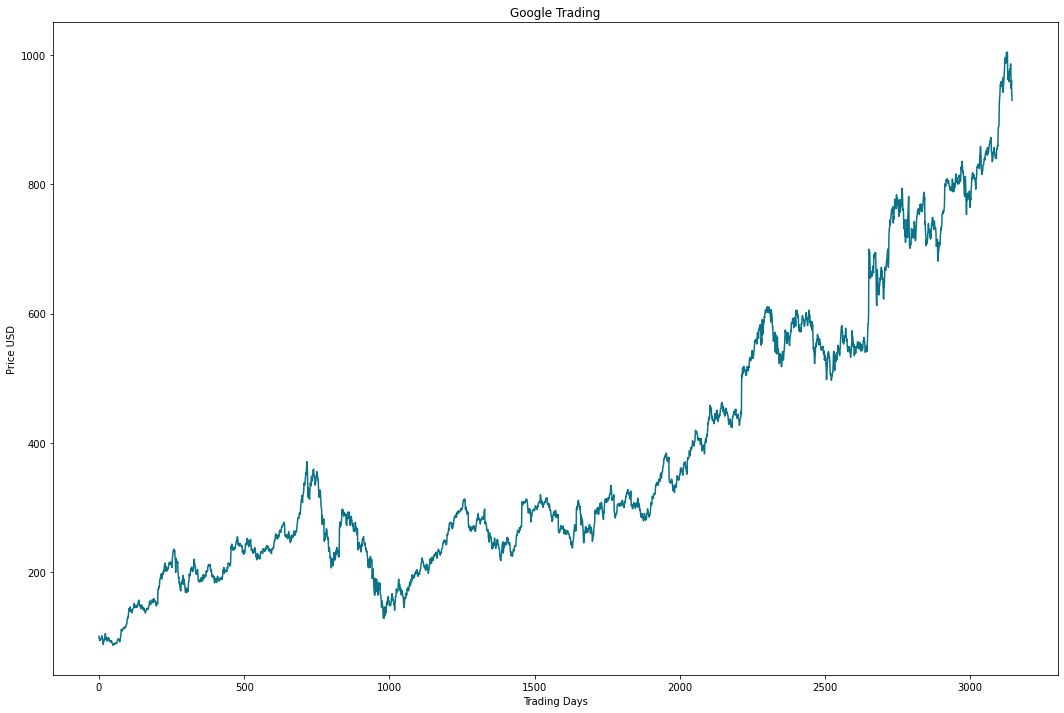

In [5]:

visualize.plot_basic(stocks)


In [6]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))


   Item      Open     Close    Volume
0     0  0.012051  0.015141  0.377248
1     1  0.014198  0.010658  0.325644
2     2  0.009894  0.010112  0.189820
3     3  0.010874  0.007407  0.242701
4     4  0.008368  0.010298  0.224905


Open   --- mean : 0.32119222938868175   	 Std:  0.23261946808306658   	 Max:  0.9999999999999999   	 Min:  0.0
Close  --- mean : 0.3215558503465895   	 Std:  0.2328307611248222   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.09061506381049178   	 Std:  0.09535947661989866   	 Max:  0.9999999999999999   	 Min:  0.0


In [7]:
null_value = stocks.isnull().sum()

null_value

Item      0
Open      0
Close     0
Volume    0
dtype: int64

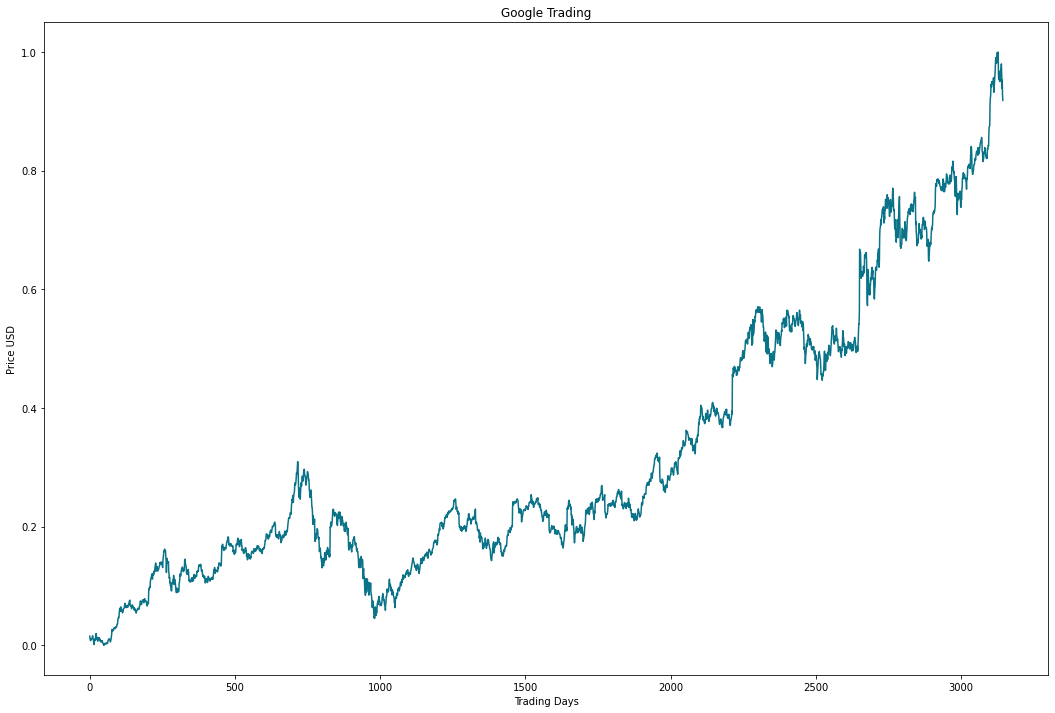

In [8]:
visualize.plot_basic(stocks)


In [14]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel
stocks_data = stocks.drop(['Item'], axis =1)


In [15]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)


AttributeError: 'DataFrame' object has no attribute 'as_matrix'

In [ ]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)


In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)


In [ ]:
predictions = model.predict(X_test)


In [ ]:
vs.plot_lstm_prediction(y_test,predictions)


In [ ]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))


In [ ]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)


In [ ]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )


In [ ]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)


In [ ]:
vs.plot_lstm_prediction(y_test,predictions)


In [ ]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))


In [ ]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)
